## MATH 152 Lab  5

Put team members' names and section number here.

In [5]:
from sympy import *
from sympy.plotting import (plot,plot_implicit)

### Question 1

#### 1a

In [6]:
x = symbols("x")
fx = (x**3 - 4*x + 3) / ((x - 5)**2 * (x**2 + 3) * (x**2 + 5))

A, B, C, D, E, F = symbols("A B C D E F")
expr = A*(x - 5)*(x**2 + 3)*(x**2 + 5) + B*(x**2 + 3)*(x**2 + 5) + (C*x + D)*(x - 5)**2 * (x**2 + 5) + (E*x + F)*(x - 5)**2 * (x**2 + 3)
print(f"Expanded decomposition: {collect(expand(expr), x)}")
x5 = A + C + E
x4 = -5*A + B - 10*C + D - 10*E + F
x3 = 8*A + 30*C - 10*D + 28*E - 10*F - 1
x2 = -40*A + 8*B - 50*C + 30*D - 30*E + 28*F
x1 = 15*A + 125*C - 50*D + 75*E - 30*F + 4
x0 = -75*A + 15*B + 125*D + 75*F - 3
coeffs = solve([x5, x4, x3, x2, x1, x0], [A, B, C, D, E, F])
print(f"The coefficients are: {coeffs}")
decomposed = (A/(x-5) + B/(x-5)**2 + (C*x + D)/(x**2 + 3) + (E*x + F)/(x**2 + 5)).subs(coeffs)
print(f"Resulting polynomial: {decomposed}")
print(f"The integral of the partial fraction decomposition is: {integrate(decomposed)}")

Expanded decomposition: -75*A + 15*B + 125*D + 75*F + x**5*(A + C + E) + x**4*(-5*A + B - 10*C + D - 10*E + F) + x**3*(8*A + 30*C - 10*D + 28*E - 10*F) + x**2*(-40*A + 8*B - 50*C + 30*D - 30*E + 28*F) + x*(15*A + 125*C - 50*D + 75*E - 30*F)
The coefficients are: {A: -5/1176, B: 9/70, C: -31/392, D: 69/392, E: 1/12, F: -17/60}
Resulting polynomial: (69/392 - 31*x/392)/(x**2 + 3) + (x/12 - 17/60)/(x**2 + 5) - 5/(1176*(x - 5)) + 9/(70*(x - 5)**2)
The integral of the partial fraction decomposition is: -5*log(x - 5)/1176 - 31*log(x**2 + 3)/784 + log(x**2 + 5)/24 + 23*sqrt(3)*atan(sqrt(3)*x/3)/392 - 17*sqrt(5)*atan(sqrt(5)*x/5)/300 - 9/(70*x - 350)


#### 1b

In [7]:
pdf = apart(fx)
print(f"The partial fraction decomposition using python is: {pdf}")
print(f"The integral of that decomposition is: {integrate(pdf)}")

The partial fraction decomposition using python is: (5*x - 17)/(60*(x**2 + 5)) - (31*x - 69)/(392*(x**2 + 3)) - 5/(1176*(x - 5)) + 9/(70*(x - 5)**2)
The integral of that decomposition is: -5*log(x - 5)/1176 - 31*log(x**2 + 3)/784 + log(x**2 + 5)/24 + 23*sqrt(3)*atan(sqrt(3)*x/3)/392 - 17*sqrt(5)*atan(sqrt(5)*x/5)/300 - 9/(70*x - 350)


#### 1c

In [8]:
print(f"The direct integral of f is: {integrate(fx)}")
assert integrate(decomposed) == integrate(pdf) and integrate(pdf) == integrate(fx)
print("The integrals from part A, B, and C are the same.")

The direct integral of f is: -5*log(x - 5)/1176 - 31*log(x**2 + 3)/784 + log(x**2 + 5)/24 + 23*sqrt(3)*atan(sqrt(3)*x/3)/392 - 17*sqrt(5)*atan(sqrt(5)*x/5)/300 - 9/(70*x - 350)
The integrals from part A, B, and C are the same.


### Question 2

#### 2a

In [9]:
x, a = symbols("x a", positive=True)

ub = symbols("ub")
lim = limit(integrate(x**2/(x**4 + a**2), (x, 0, ub)), ub, oo)
sol = solve(lim - 0.1, a)
print(f"The value of a is: {sol[0]}")

The value of a is: 123.370055013617


#### 2b

In [10]:
f = x**6 * exp(-x**7)
eq = Eq(integrate(f, (x, 1, a)), integrate(f, (x, a, oo)))
sol = nsolve(eq, a, 1)
print(f"The value of a is: {sol}")

The value of a is: 1.07812886361817


#### 2c

In [11]:
oneToA = integrate(f, (x, 1, sol))
aToInf = integrate(f, (x, sol, oo))
print(f"The integral from 1 to infinity is: {N(oneToA + aToInf)}")

The integral from 1 to infinity is: 0.0525542058816346


### Question 3

#### 3a

In [12]:
x = symbols("x")
fx = (abs(x) * cos(x)**2) / x**3
gx = 1/x**2

expr = integrate(gx, (x, 1, oo))
print(f"The improper integral converges to: {expr}")

The improper integral converges to: 1


#### 3b

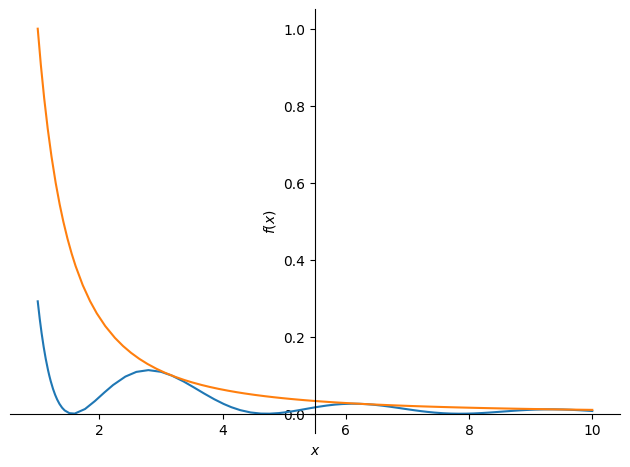

In [13]:
plot(fx, gx, (x, 1, 10))

#### 3c

In [14]:
fx = (x * cos(x)**2) / x**3
expr = limit(integrate(fx, (x, 1, ub)), ub, oo)
print(f"The exact value of the improper integral is: {expr}")
print(f"The approximate value of the improper integral is: {N(expr)}")

The exact value of the improper integral is: -pi/2 + cos(2)/2 + 1/2 + Si(2)
The approximate value of the improper integral is: 0.326543231734227
